# Heavy vs. Light Tails

Heavy-tailed distributions are those that have a tail that is heavier than an exponential distribution. This means that the probability of observing an extreme value is higher than what would be expected if the distribution were exponential. In contrast, light-tailed distributions have tails that are lighter than an exponential distribution, meaning that the probability of observing an extreme value is lower than what would be expected if the distribution were exponential.

Here, we will explore the differences between heavy-tailed and light-tailed distributions by comparing the tails of the 3 distributions and examining how they affect the behavior of the distributions.
1. Normal Distribution with $\mu = 0$ and $\sigma^2 = 1$
2. Weibull Distribution with $\alpha = 0.4$
3. Pareto Distribution with $\alpha = 0.6$ and scale parameter $x_L = 1/4$

In [35]:
import numpy as np
from scipy import stats
from scipy.special import gamma
from sklearn import linear_model
import matplotlib.pyplot as plt
import heapq

n = 10000 # Arbitrary plotting value for large n

## Law of Large Numbers

Here, we make two plots of $S_n$ vs. $n$ for each of the distributions – the first plot over $n∈${1,2, . . . ,20} and the second one over the full range of $n$. 

The below figures display how the cumulative sum of the samples of our distributions increase with n. The Law of Large numbers tells us that as our number of samples $n \rightarrow \infty$, the sample mean should approach the true population mean.

For the Normal distribution, we see that as n increases, the cumulative sum of the normal distribution seems to erratically fluctuate around 0, revealing it to be our mean. All these increments are normally distributed around mean 0 such that the average rate of change is 0 as $n \rightarrow \infty$.

The cumulative sum of the Weibull distribution seems to increase linearly with n. This is because the Weibull distribution with $0 < \alpha < 1$ is very skewed such that it can take long to approach the population mean. In the extreme case where $\alpha = 0$, a mean doesn't exist for the Weibull distribution and the Law of Large Numbers doesn't apply, and here the relatively close $\alpha = 0.4$ will make it so it takes longer to reach that convergence. 

The cumulative sum of the Pareto distribution seems to increase very slowly on average from point to point, but with one point every couple draws dramatically increasing the cumulative sum. This is because the Pareto distribution is a heavy-tailed distribution with a tail that is heavier than an exponential distribution. It has infinite mean such that the Law of Large numbers doesn't apply.

In [36]:
def make_graph_a(
    # Function to make our plots look nice
    xs,
    ys,
    distribution="Standard Normal",
    xlabel="Number of Variable Draws (n)",
    ylabel="Cumulative Sum"):
    """
    xs: List of x values to plot
    ys: List of y values to plot
    distribution: The name of the distribution that you are plotting
    """
    title = "{0} of {1} Distribution".format(ylabel, distribution)
    
    plt.subplots(1, 2, figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.plot(xs[:20], ys[:20])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + " (First 20 values)")

    plt.subplot(1, 2, 2)
    plt.plot(xs, ys)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()
    

In [37]:
# Create n random draws of our 3 distributions

# 1. Normal Distribution with mu = 0 and sigma^2 = 1
normal_mu = 0
normal_sigma = 1
normal_draws = np.random.normal(loc=normal_mu, scale=normal_sigma, size=n)

# 2. Weibull Distribution with alpha = 0.4
weibull_alpha = 0.4
weibull_draws = np.random.weibull(a=weibull_alpha, size=n)

# 3. Pareto Distribution with alpha = 0.6 and scale parameter x_L = 1/4
pareto_alpha = 0.6
pareto_scale = 1/4
pareto_draws = pareto_scale * np.random.pareto(a=pareto_alpha, size=n) 

# Make plots of the partial sums
x_range = np.linspace(1, n, num=n)
normal_cumsum = np.cumsum(normal_draws)
weibull_cumsum  = np.cumsum(weibull_draws)
pareto_cumsum = np.cumsum(pareto_draws)

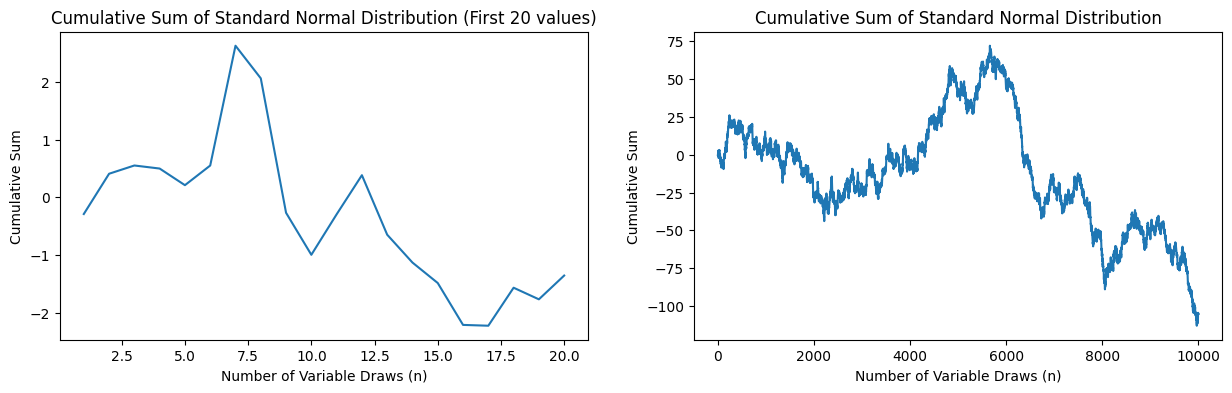

In [38]:
make_graph_a(
    x_range,
    normal_cumsum,
    distribution="Standard Normal")

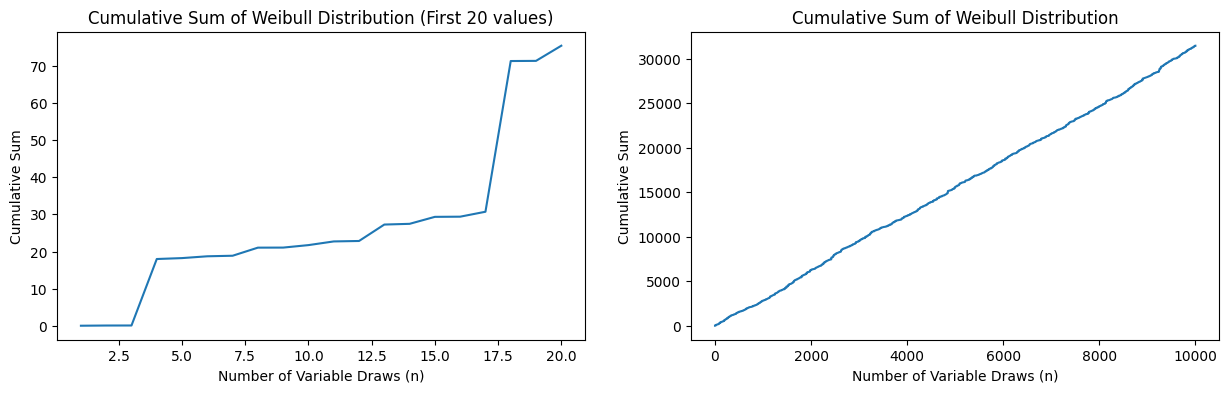

In [39]:
make_graph_a(
    x_range,
    weibull_cumsum,
    distribution="Weibull")

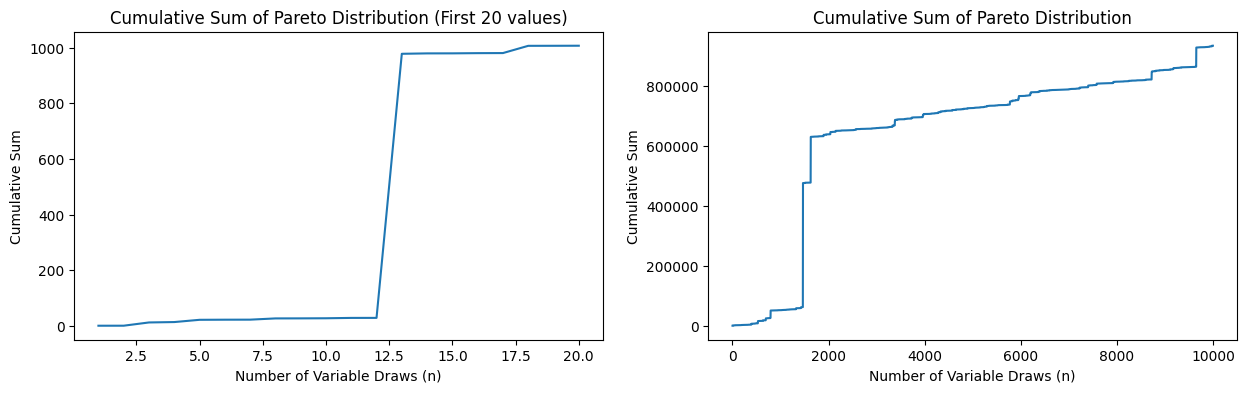

In [40]:
make_graph_a(
    x_range,
    pareto_cumsum,
    distribution="Pareto")

## Central Limit Theorem

The Central Limit Theorem tells us that deviations of $S_n$ from its mean are of size $\sqrt{n}$. That is, $S_n ≈ nE[X] + O(\sqrt{n})$. To visualize this, we plot $\frac{S_n − nE[X]}{\sqrt{n}}$ vs. $n$ for each of the distributions. 

The Central Limit Theorem requires both finite mean and finite variance. The figures below show how the Normal and Weibull distribution sample means deviate from their population mean with respect to $\sqrt n$. 

The Normal distribution has both finite mean and variance such that the Central Limit Theorem applies. We see that this is indeed the case for the Normal Distribution as the deviations of $S_n$ from its mean are of size $\sqrt{n}$. 

The Weibull distribution has finite mean and variance such that the Central Limit Theorem applies, but its extreme skewed-ness makes this less obvious with the scaled deviation from $S_n$ reaching all the way down to -25 before going back up. 

The Pareto distribution with $\alpha < 1$ has infinite mean such that the Central Limit Theorem doesn't apply. This is why we don't plot the Pareto distribution here.

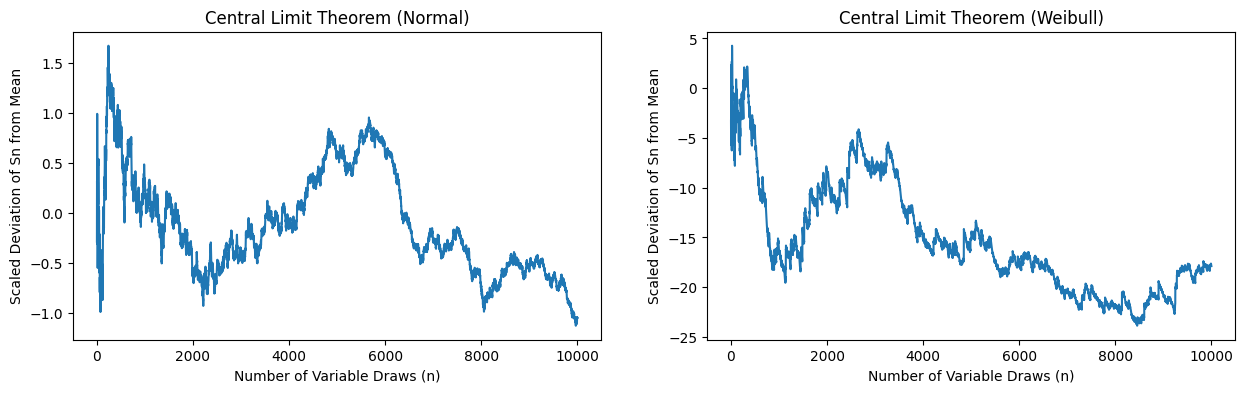

In [41]:
# Test the CLT by plotting the scaled deviation of Sn from its mean

# Calculate the mean of the distributions (already know normal mean)
weibull_mean = gamma(1 + 1/weibull_alpha)

normal_clt = [(S - x * normal_mu) / np.sqrt(x) for x, S in zip(x_range, normal_cumsum)]
weibull_clt = [(S - x * weibull_mean) / np.sqrt(x) for x, S in zip(x_range, weibull_cumsum)]

# Plot the CLT deviations
plt.subplots(1, 2, figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(x_range, normal_clt)
plt.xlabel("Number of Variable Draws (n)")
plt.ylabel("Scaled Deviation of Sn from Mean")
plt.title("Central Limit Theorem (Normal)")

plt.subplot(1, 2, 2)
plt.plot(x_range, weibull_clt)
plt.xlabel("Number of Variable Draws (n)")
plt.ylabel("Scaled Deviation of Sn from Mean")
plt.title("Central Limit Theorem (Weibull)")
plt.show()

## The 80-20 rule

Vilfredo Pareto was motivated to define the Pareto distribution by this observation: 80% of the wealth in society is held by 20% of the population. This is an important distinguishing feature between heavy-tailed and light-tailed distributions. To get some experience with this and imagine the effect this has on our society, let us suppose that our samples represent the incomes of 10000 individuals in a city. We skip the Normal distribution here because some values are negative, which doesn't make sense for income.

Here, we compute the fraction $f(r)$ of the total income of the city held by the wealthiest $r$% of the population, for $r$ = 1,2,· · ·,20 for each distribution and plot $f(r)$ vs. $r$ on a single plot. 

The Pareto distribution is so skewed that the top 1% of people hold more than 90% of wealth and the top 5% hold almost everything. This is an even more extreme example of the 80-20 rule, and makes sense because the Pareto distribution was made to model exactly this.

The Weibull distribution is also skewed, but not nearly as much as the Pareto distribution. The top 1% of people hold only about 20$ of the wealth, the top 5% hold about 50% of the wealth, and we reach 80% of wealth at the top 20%. We see this is a gradual and seemingly smooth increase from 1% to 20%, as opposed to the dramatic disparities of heavy-tails.

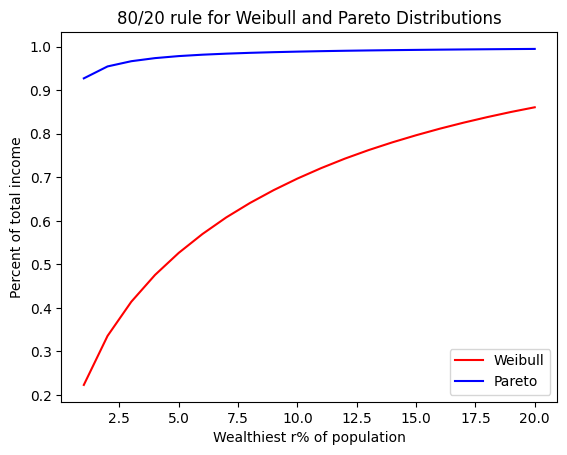

In [42]:
# Get the sums of all the wealth in the society
weibull_total = sum(weibull_draws)
pareto_total = sum(pareto_draws)

# Get the sums of the largest r% of the population for each r% from 1 to 20
weibull_largest = [sum(heapq.nlargest(int(n * r / 100), weibull_draws)) / weibull_total for r in range(1, 21)]
pareto_largest = [sum(heapq.nlargest(int(n * r / 100), pareto_draws)) / pareto_total for r in range(1, 21) ]

# Once the above lists are generated, we can make our plots
rRange = np.linspace(1, 20, num=20)

plt.plot(rRange, weibull_largest, 'r')
plt.plot(rRange, pareto_largest, 'b')
plt.xlabel("Wealthiest r% of population")
plt.ylabel("Percent of total income")
plt.title("80/20 rule for Weibull and Pareto Distributions")
plt.gca().legend(("Weibull", "Pareto"))
plt.show()

## Identifying Heavy Tails

We plot the frequencies and ranks of the 10000 samples on log-logscales for each of our distributions in order to get an initial gauge of which exhibit heavy tails. Although these methods are not conclusive, they can at least point us in the right direction (and in this case, we already know which are heavy-tailed because we are using formulaic distributions). 

Since we are using a log-log scale, we filter out all negative and zero values before graphing. We also run and display linear regressions along with the R-squared values. 

The frequency plots show that the Weibull and Pareto distributions may be heavy-tailed with the distinctive horizontal lines in the lower right corner of our plots. It shows that the Normal distribution is not heavy-tailed because it doesn't have this.

Doing further analysis, the rank plots show that only the Pareto distribution can be heavy-tailed. The Normal distribution is obviously not heavy-tailed by this point, and the Weibull distribution doesn't show a linear relationship on the rank plot. The negative linear relationship after a certain point for the Pareto distribution shows that it has the potential to be heavy-tailed with additional analysis. 

These tests are not enough to definitively conclude whether a distribution is heavy-tailed as more concrete methods are necessary, but they provide a good initial indicator for whether the distribution is likely to be heavy-tailed. In this case, we know that the Pareto distribution is heavy-tailed by definition, but usually we would need to do more to conclude this for a general unknown distribution.

In [43]:
# Note: Feel free to modify this template as you wish or build your own from scratch.
# This is a tricky problem to implement so we hope we are helping by providing a template!

def pdf(data, dx=1):
    '''Takes an array with random samples from a distribution, 
    and creates an approximate PDF of points, to use when frequency
    Returns a tuple of two vectors x, y where 
    y_i = P(x_i - dx/2 <= data < x_i + dx/2)'''
  
    low, high = np.min(data), np.max(data)
    x, y = [], []
    
    for d in data:
        i = int((d + dx / 2 - low) / dx)
        xi = low + i * dx
        if xi in x:
            y[x.index(xi)] += 1
        else:
            x.append(xi)
            y.append(1)
    
    return np.array(x), np.array(y)
    
def ccdf(data):
    '''Takes an array with random samples from a 
    distribution, and creates an approximate CCDF 
    (complementary CDF) of points. Returns a tuple of 
    two vectors x, y where y_i = P(data > x_i)'''    
    sortd = np.sort(data) # Sort the data in ascending order
    ecdf = np.arange(1, len(sortd)+1) / len(sortd) # Compute the empirical CDF
    return sortd, 1 - ecdf

def keep_positive(data):
    '''Takes an array with random samples from
    a distribution, and filters our negative and 
    zero entries (in both x and y) in data'''
    return zip(*[(x, y) for x, y in zip(*data) if x > 0 and y > 0])
    
def non_outliers(x, m):
    '''Takes an array x of data and an integer m,
    and returns a list z of boolean values such 
    that z_i indicates whether the mean-centered 
    value x_i is within m std devs of the values in x'''
    mean = np.mean(x)
    std = np.std(x)
    return [abs(x_i - mean) < m * std for x_i in x]
    
def reject_outliers(data, m):
    '''Takes an array of data in the form of a list of
    tuple (x,y), where x and y are arrays and an integer m,
    and removes outliers from the data'''
    xs, ys = data
    tuples = ([(x, y) for x, y, within_x, within_y in zip(xs, ys, non_outliers(xs, m), non_outliers(ys, m)) if within_x and within_y])
    print("Removed " + str(len(xs) - len(tuples)) + " outliers " + str(m) + " std devs away")
    return zip(*tuples)
    # Note that since we are plotting on log-log scale
    # Removing outliers should happen AFTER we move to log-log scale
    
    # HINT: This function returns the (x, y) tuples in data that 
    # are not outliers (non_outliers() is helpful here)
    
    # HINT: You must set m to a default value that defines how many 
    # standard deviations away an outlier is. We are testing that 
    # these distributions are heavy-tailed, so too tight of a range 
    # won't be helpful.
    
    pass
    
def linear_regression(X, y):
    '''Takes (one-dimensional) training data X 
    and labels y and fits the simple linear regression 
    model y = mX + b, and computes the coefficient 
    of determination (r^2). Returns a tuple (m, b, r^2)'''
    X = np.array(X).reshape(-1, 1)
    y = np.array(y)
    model = linear_model.LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]
    b = model.intercept_
    r2 = model.score(X, y)
    return m, b, r2

def make_graphs_d(data, title, labels, ylabel='', xlabel=''):
    """
    Build respective PDF/CCDF for all three distributions
    Attempts to create a best-fit line
    And plots this line alongside the points
    data: List of pdf() outputs from all 3 distributions
    title: Either 
        Frequency plot (PDF)
        Rank plot (CCDF)
    labels: List of distribution names
        i.e. ["Normal, Weibull, Pareto"]
    """
    # General plotting function for points, as well as best-fit line
    for (X, y), label in zip(data, labels):
        m, b, r2 = linear_regression(X, y)
        plt.scatter(X, y, label=label, s=1)
        plt.plot(X, b + m * X, label='y = %.2f * x + %.2f, r2 = %.3f' % (m, b, r2))
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend()
        plt.show()

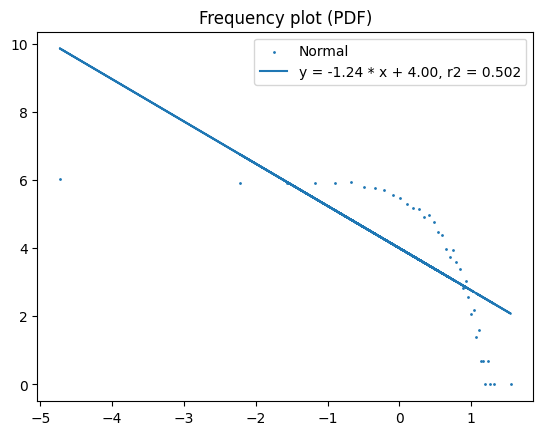

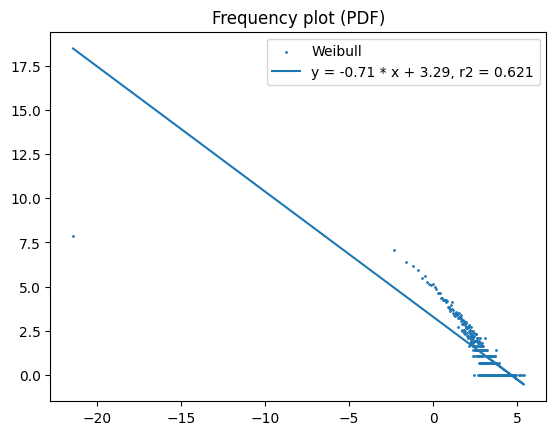

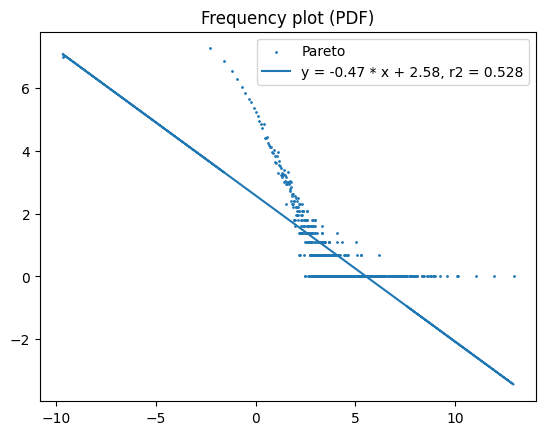

In [44]:
# Concatenate data into one list to reduce code repetition
Xi = [normal_draws, weibull_draws, pareto_draws]
names = ["Normal", "Weibull", "Pareto"]

# Build the PDF and turn it into a log-log scale,
# first removing all negative values and outliers
data = [pdf(Xi[i], dx=0.1) for i in range(3)]
data = [keep_positive(d) for d in data]
data = [(np.log(X), np.log(y)) for (X, y) in data]

# Plot the frequencies
make_graphs_d(data, 'Frequency plot (PDF)', names)

Removed 0 outliers 5 std devs away
Removed 73 outliers 5 std devs away
Removed 6 outliers 5 std devs away


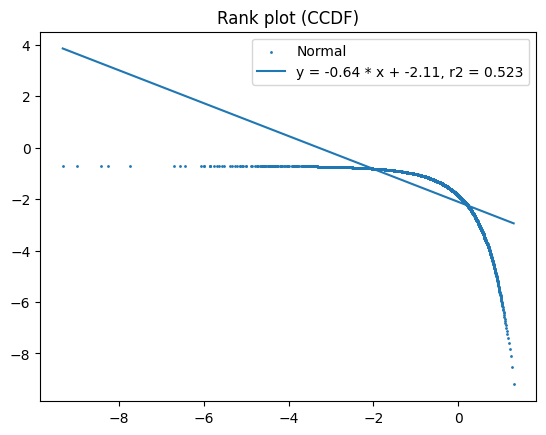

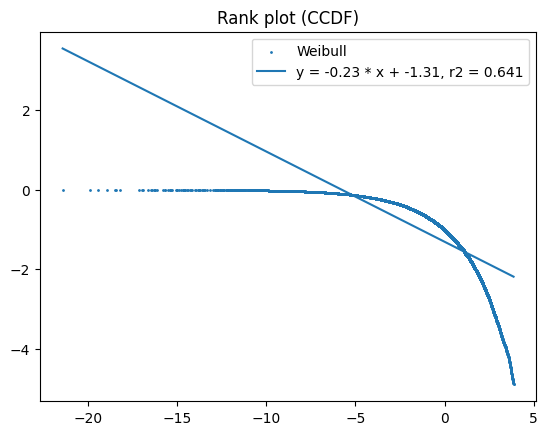

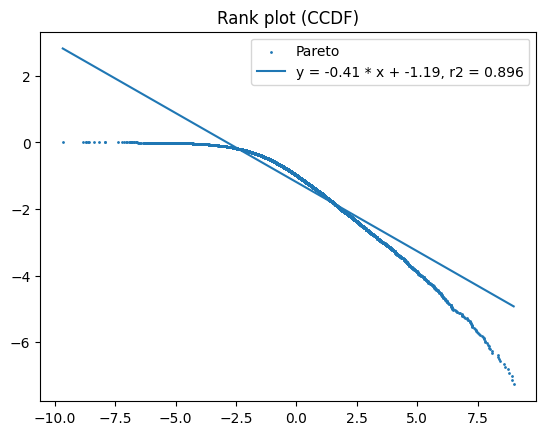

In [45]:
data = [ccdf(Xi[i]) for i in range(3)]

# Build the CCDF and turn it into a log-log scale,
# first removing all negative values and corresponding indices
# TODO: Do we remove outliers here?
data = [keep_positive(d) for d in data]
data = [reject_outliers(d, 5) for d in data]
data = [(np.log(X), np.log(y)) for (X, y) in data]

# Plot the ranks
make_graphs_d(data, 'Rank plot (CCDF)', names)